# Import Required Python Libraries

In [588]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import PowerTransformer

# Import House Prices Data, Get General Information

In [589]:
data = pd.read_csv('ames.csv')
data = data.drop_duplicates()
data = data.drop(columns = ['Order'])

In [590]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS.SubClass      2930 non-null   int64  
 2   MS.Zoning        2930 non-null   object 
 3   Lot.Frontage     2440 non-null   float64
 4   Lot.Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot.Shape        2930 non-null   object 
 8   Land.Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot.Config       2930 non-null   object 
 11  Land.Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition.1      2930 non-null   object 
 14  Condition.2      2930 non-null   object 
 15  Bldg.Type        2930 non-null   object 
 16  House.Style      2930 non-null   object 
 17  Overall.Qual  

# View Sample of the Data

In [591]:
data.head()

,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Summary Statistics on Data Variables

In [592]:
data.describe()

,PID,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Mas.Vnr.Area,BsmtFin.SF.1,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,TotRms.AbvGrd,Fireplaces,Garage.Yr.Blt,Garage.Cars,Garage.Area,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold,SalePrice
count,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


# Distribution Plots for the Numeric Variables

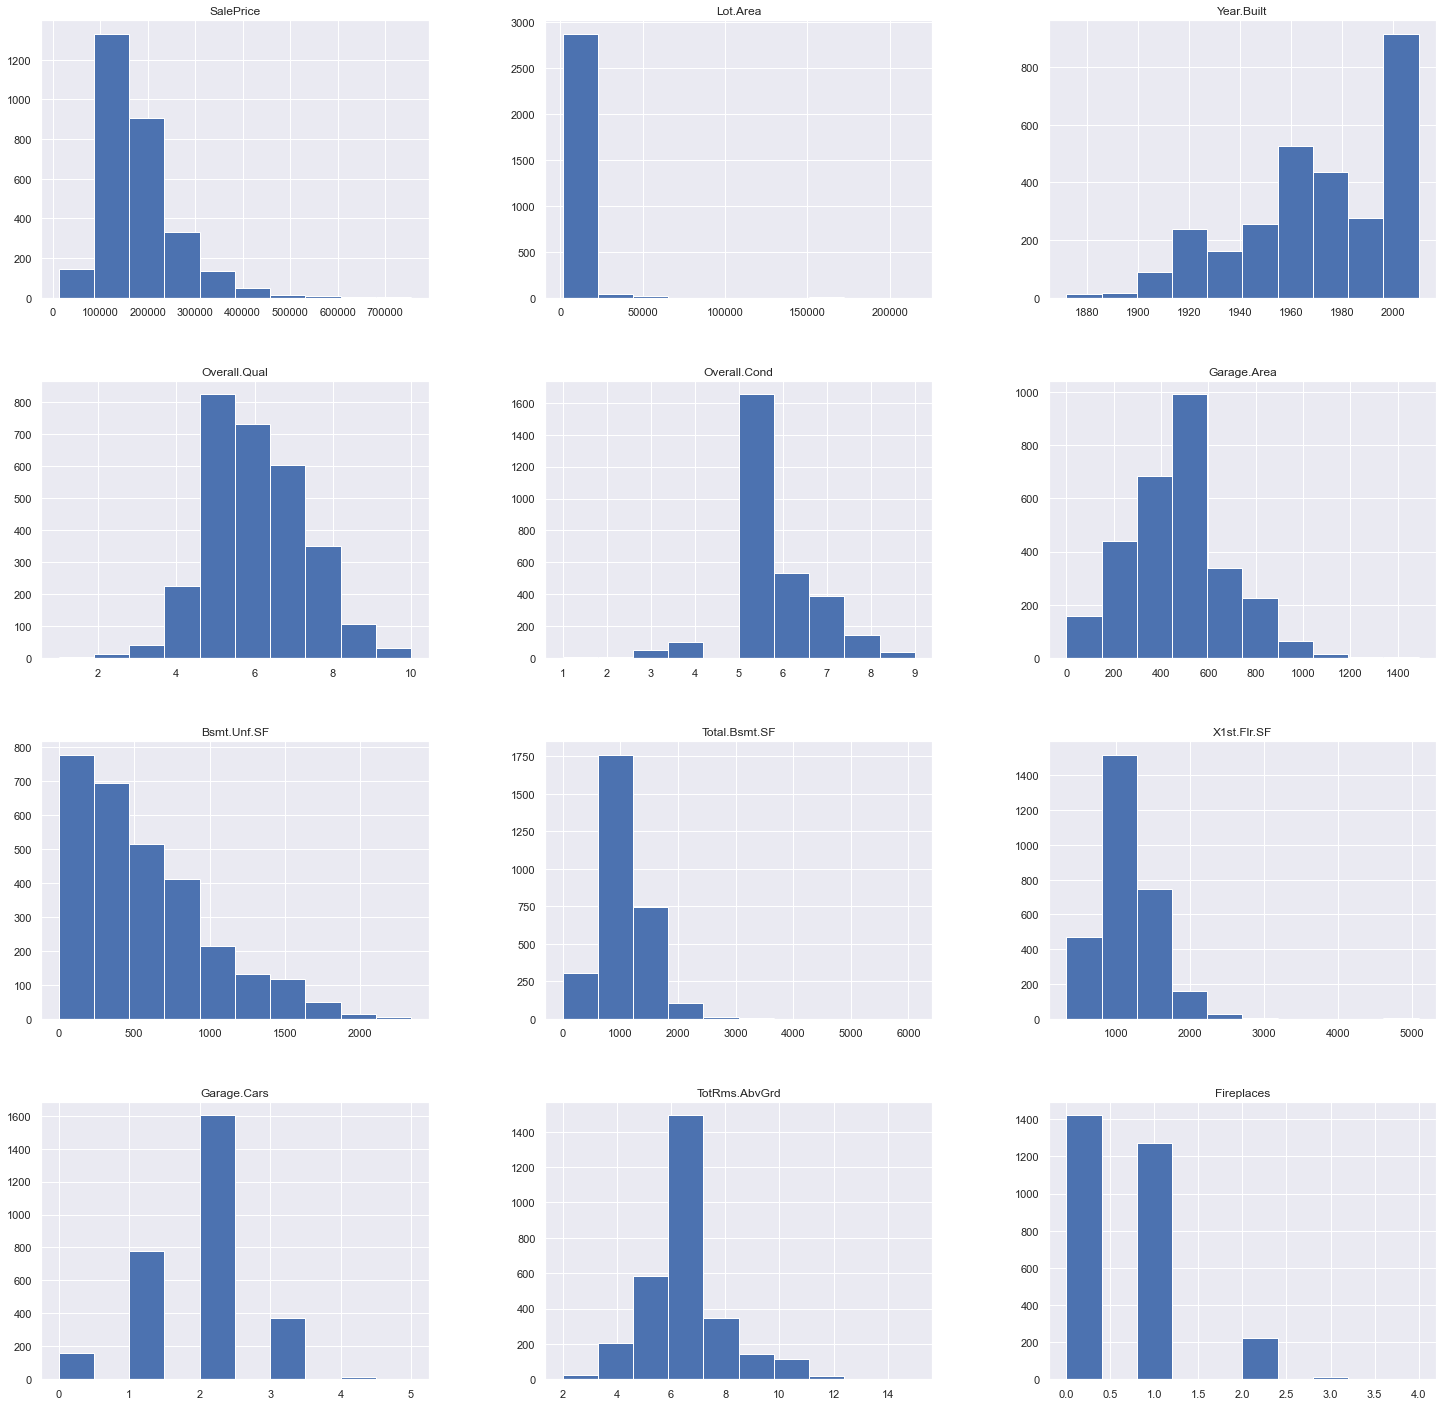

In [593]:
%matplotlib inline
data_distributions = data[['SalePrice','Lot.Area','Year.Built','Overall.Qual','Overall.Cond','Garage.Area','Bsmt.Unf.SF',
                           'Total.Bsmt.SF','X1st.Flr.SF','Garage.Cars','TotRms.AbvGrd','Fireplaces']]
data_distributions.hist(figsize=(25,25))
plt.show()

# Check for Missing Values

In [594]:
Checkmissing=data.isnull().sum().to_frame('Missing_Value_Count')
Checkmissing[Checkmissing['Missing_Value_Count']>0]

,Missing_Value_Count
Lot.Frontage,490
Alley,2732
Mas.Vnr.Type,23
Mas.Vnr.Area,23
Bsmt.Qual,80
Bsmt.Cond,80
Bsmt.Exposure,83
BsmtFin.Type.1,80
BsmtFin.SF.1,1
BsmtFin.Type.2,81


# Correlations of the Independent Variables to the Dependent Variable

In [595]:
corr_matrix = data.corr()

In [596]:
corr_matrix["SalePrice"].sort_values(ascending=False).to_frame('Correlations')

,Correlations
SalePrice,1.000000
Overall.Qual,0.799262
Gr.Liv.Area,0.706780
Garage.Cars,0.647877
Garage.Area,0.640401
Total.Bsmt.SF,0.632280
X1st.Flr.SF,0.621676
Year.Built,0.558426
Full.Bath,0.545604
Year.Remod.Add,0.532974


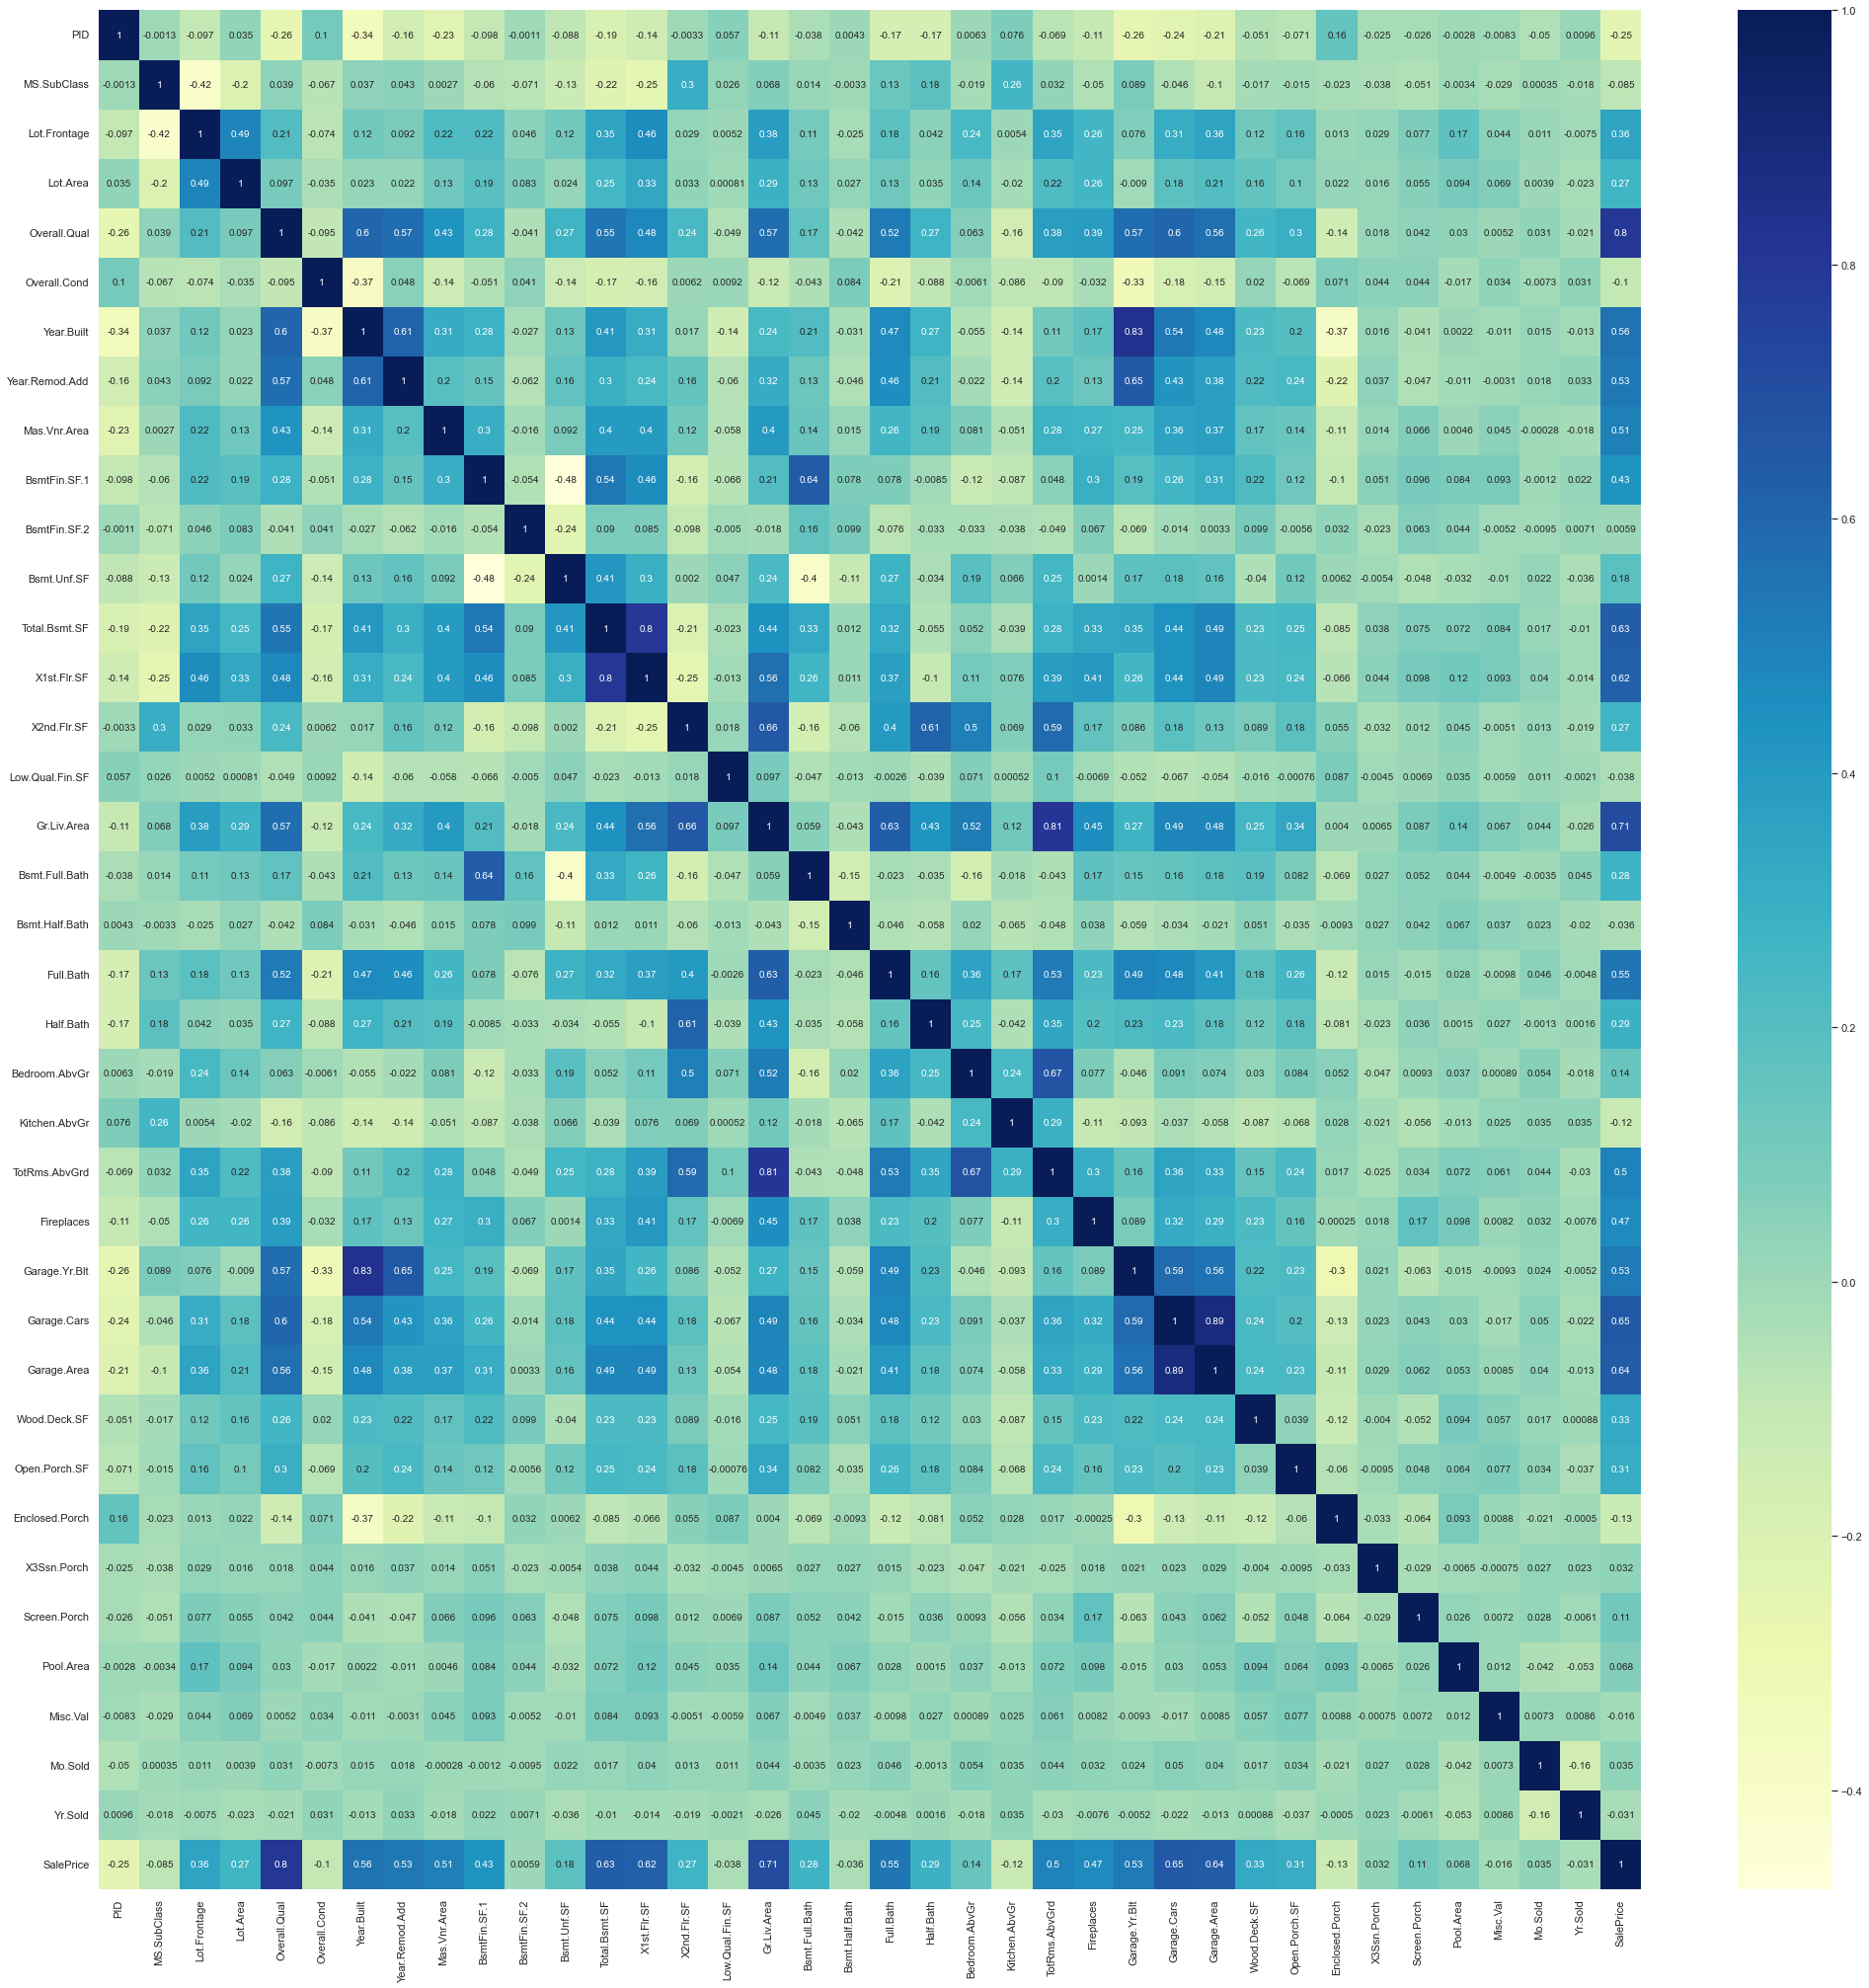

In [597]:
plt.figure(figsize = (35,35))
correlation_plot = sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

# Separate Independent/Dependent Variables in the Train Set

In [598]:
data_labels = data["SalePrice"]
data = data.drop("SalePrice", axis=1)

# Split the Data into Train/Test Splits

In [599]:
x_train, x_test, y_train, y_test = train_test_split(data, data_labels, test_size=0.2)

# Split Train Dataset based on variable types (Categorical vs Numeric)

In [600]:
data_char = x_train.loc[:,x_train.dtypes==object]
data_num = x_train.loc[:,x_train.dtypes!=object]

# Show Character Variables

In [601]:
data_char.head()

,MS.Zoning,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.Type.2,Heating,Heating.QC,Central.Air,Electrical,Kitchen.Qual,Functional,Fireplace.Qu,Garage.Type,Garage.Finish,Garage.Qual,Garage.Cond,Paved.Drive,Pool.QC,Fence,Misc.Feature,Sale.Type,Sale.Condition
1669,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2614,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,WdShing,Wd Shng,None,TA,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,FuseA,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2267,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Ex,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1441,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
473,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# Show Numeric Variables

In [602]:
data_num.head()

,PID,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Mas.Vnr.Area,BsmtFin.SF.1,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,TotRms.AbvGrd,Fireplaces,Garage.Yr.Blt,Garage.Cars,Garage.Area,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold
1669,527404150,20,NaN,7340,4,6,1971,1971,0.0,322.0,0.0,536.0,858.0,858,0,0,858,0.0,0.0,1,0,2,1,4,0,1979.0,1.0,684.0,0,0,0,0,0,0,0,6,2007
2614,535404080,20,73.0,7100,5,7,1957,1957,0.0,708.0,0.0,108.0,816.0,816,0,0,816,1.0,0.0,1,0,2,1,5,0,1957.0,1.0,308.0,0,0,0,0,0,0,0,7,2006
2267,916455050,20,NaN,6718,8,5,2001,2001,86.0,250.0,0.0,1017.0,1267.0,1312,0,0,1312,0.0,0.0,2,0,2,1,5,0,2001.0,2.0,471.0,256,28,0,0,0,0,0,1,2007
1441,907194020,60,80.0,12435,7,5,2001,2001,172.0,361.0,0.0,602.0,963.0,963,829,0,1792,0.0,0.0,2,1,3,1,7,1,2001.0,2.0,564.0,0,96,0,245,0,0,0,5,2008
473,528228460,120,43.0,3182,7,5,2005,2006,11.0,16.0,0.0,1129.0,1145.0,1145,0,0,1145,0.0,0.0,2,0,2,1,5,1,2005.0,2.0,397.0,100,16,0,0,0,0,0,9,2009


# Data Manipulation Pipeline (Handling Missing Values, Feature Selection, Encoding for Character Variables, Feature Scaling for Numeric Variables)

In [603]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values


num_vars = list(data_num)
char_vars = list(data_char)

numerical_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_vars)),
    ('imputer',SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)),
    ('feature_scaler', MaxAbsScaler()),
    ('log_transformer',PowerTransformer()),
    ('feature_selection', PCA(n_components=0.95))
])       

categorical_pipeline = Pipeline([
    ('selector', DataFrameSelector(char_vars)),
    ('encoder', OneHotEncoder(handle_unknown = 'ignore')),
    ('feature_selection', TruncatedSVD(n_components=20))
]) 

full_pipeline = FeatureUnion(transformer_list=[
    ("numerical_pipeline", numerical_pipeline),
    ("categorical_pipeline", categorical_pipeline)
])

prepared_data = full_pipeline.fit_transform(x_train)
prepared_data_test = full_pipeline.transform(x_test)


# Train & Evaluate ML Model

### Gradient Boosted Tree model will be used to predict house prices

In [604]:
from xgboost import XGBRegressor

### Train the ML Model on the Train Dataset

In [617]:
model = XGBRegressor(learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=800)
model.fit(prepared_data, y_train)
housing_predictions = model.predict(prepared_data)
#r2 = r2_score(y_train, housing_predictions)

### Evaluate the ML Model on the Test Dataset

In [668]:
housing_prediction_test = model.predict(prepared_data_test)
r2 = r2_score(y_test, housing_prediction_test)

In [669]:
r2

0.9086626866108398

# Generate House Price Estimates Using the Final ML Model

### Create Sample Data for a Random House

In [621]:
house = pd.read_csv('Ames_Random_Estimate.csv')
house

,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,526301100,20,RL,141,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112,TA,TA,CBlock,TA,Gd,Gd,BLQ,639,Unf,0,441,1080,GasA,Fa,Y,SBrkr,1656,0,0,1656,1,0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960,Fin,2,528,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000


In [622]:
house_labels = house["SalePrice"]
house = house.drop("SalePrice", axis=1)

### Select Some Parameters for Our House and See What Valuation the Model Gives It

In [676]:
house["Year.Built"] = 1973
house["House.Style"] = '1Story'
house["Bedroom.AbvGr"] = 3
house["Full.Bath"] = 2
house["TotRms.AbvGrd"] = 6
house["Overall.Qual"] = 6
house["Gr.Liv.Area"] = 1050
house["Garage.Cars"] = 2

In [677]:
prepared_sample = full_pipeline.transform(house)
house_estimate = model.predict(prepared_sample)

In [678]:
print("The Estimated sale price of our house is", round(house_estimate[0]), "dollars")

The Estimated sale price of our house is 194856 dollars


In [665]:
#Grid Search
#from sklearn.model_selection import GridSearchCV
#parameter_grid  =[
#    {
#    'n_estimators': [100, 400, 800],
#    'max_depth': [3, 6, 9],
#    'learning_rate': [0.05, 0.1, 0.20],
#    'min_child_weight': [1, 10, 100],
#    }
#]#

#model = XGBRegressor()
#grid_search = GridSearchCV(model, parameter_grid, cv=5, scoring='neg_mean_squared_error')
#grid_search.fit(prepared_data, y_train)

In [666]:
#grid_search.best_params_